Logistic regression for imbalanced dataset 

In [1]:
from collections import Counter
from sklearn.datasets import make_classification

In [2]:
##imbalanced dataset
X,y = make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,
n_redundant=0,weights=[0.99],random_state=10)

In [3]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [4]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

In [5]:
import seaborn as sns

<Axes: xlabel='Feature1', ylabel='Feature2'>

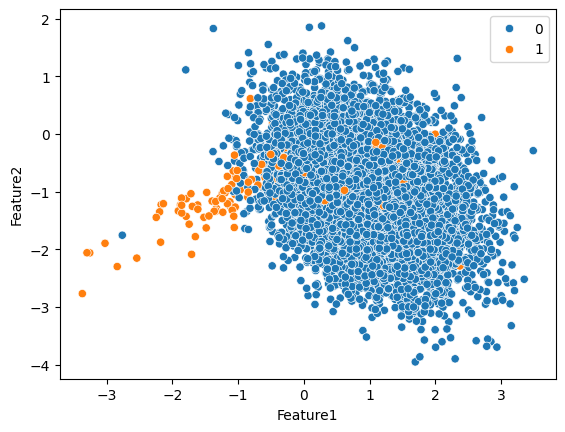

In [7]:
import seaborn as sns
import pandas as pd

# Convert X to a DataFrame if it's not already
df_X = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# Create the scatterplot
sns.scatterplot(x=df_X['Feature1'], y=df_X['Feature2'], hue=y)


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [9]:
#Hyperparameter tunning 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
class_weight = [{0:w,1:y} for w in [1,10,50,100]for y in [1,10,50,100]]

In [10]:
params = dict(penalty=penalty, C=c_values,solver=solver,class_weight=class_weight)

In [11]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold()
grid = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [13]:
grid.fit(X_train,y_train)

/Users/abhishekprakash/Desktop/Resume/code/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abhishekprakash/Desktop/Resume/code/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abhishekprakash/Desktop/Resume/code/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abhishekprakash/Desktop/Resume/code/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abhishekprakash/Desktop/Resume/code/venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reac

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [14]:
grid.best_score_

np.float64(0.9882666666666667)

In [15]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [16]:
y_pred = grid.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.9896
[[2465    0]
 [  26    9]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2465
           1       1.00      0.26      0.41        35

    accuracy                           0.99      2500
   macro avg       0.99      0.63      0.70      2500
weighted avg       0.99      0.99      0.99      2500



Logistic Regression wiith ROC curve And ROC AUC score 

In [22]:
#roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [23]:
#generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)


In [24]:
#split the data into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [29]:
#generate a  no skill predection (majority class)
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]